In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [3]:
# make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)
# factor : float, default=.8
# Scale factor between inner and outer circle in the range [0, 1)

In [4]:
x, y = make_circles(n_samples=500, noise=0.1)

In [6]:
x.shape, y.shape

((500, 2), (500,))

In [15]:
x[0,], y[0],\
x[5,], y[5]

(array([-0.99590807, -0.08406434]), 0, array([0.13832998, 0.67566086]), 1)

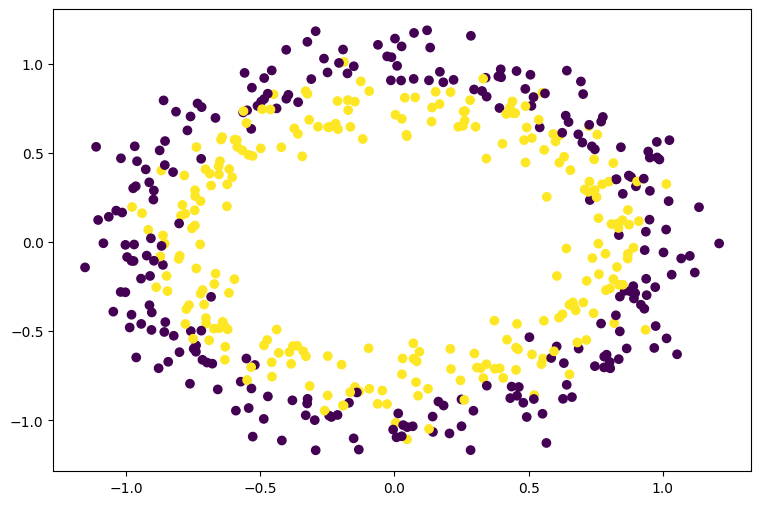

In [16]:
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [19]:
x = torch.FloatTensor(x)
print(x.size())

torch.Size([500, 2])


In [20]:
x[0,]

tensor([-0.9959, -0.0841])

In [32]:
def l2distance(a, b):
    return torch.argmin(torch.sum((a - b) ** 2, dim=1), dim=0)


def kmeans(x, num_clusters=2, max_iteration = 30):

    centroids = torch.rand(num_clusters, x.size(1))
    print(f'centroids : {centroids}')
    #  tensor([[0.5162, 0.4634],
    #     [0.7645, 0.4234]])
    for update in range(max_iteration):
        y_assign = []
        for m in range(x.size(0)):
            h = x[m].expand(num_clusters,-1)
            # print(f'h : {h}') # tensor([[0.7466, 0.5200],[0.7466, 0.5200]])
            assign = l2distance(h, centroids)
            # print(assign) # tensor(0) tensor(1)
            y_assign.append(assign.item())

        y_assign = np.array(y_assign)
        if update != max_iteration-1:
            for i in range(num_clusters):
                idx = np.where(y_assign == i)[0]
                if len(idx) == 0:
                    centroids[i] = torch.rand(x.size(1))
                else:
                    centroids[i] = torch.mean(x[idx], dim=0)

    return y_assign, centroids

In [34]:
y_pred, centroids = kmeans(x, 2)
y_pred

centroids : tensor([[0.3289, 0.3761],
        [0.3834, 0.8414]])


array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,

centroids : tensor([[0.5162, 0.4634],
        [0.7645, 0.4234]])


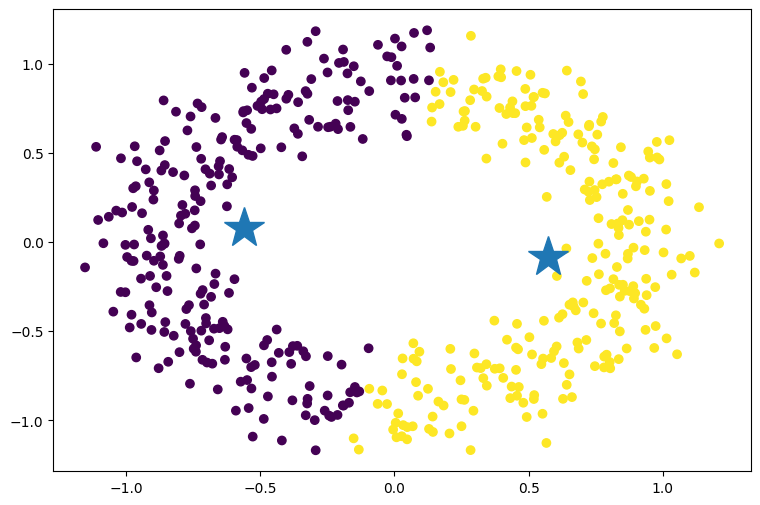

In [33]:
y_pred, centroids = kmeans(x, 2)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0], centroids[:,1], '*', markersize=30)
plt.show()

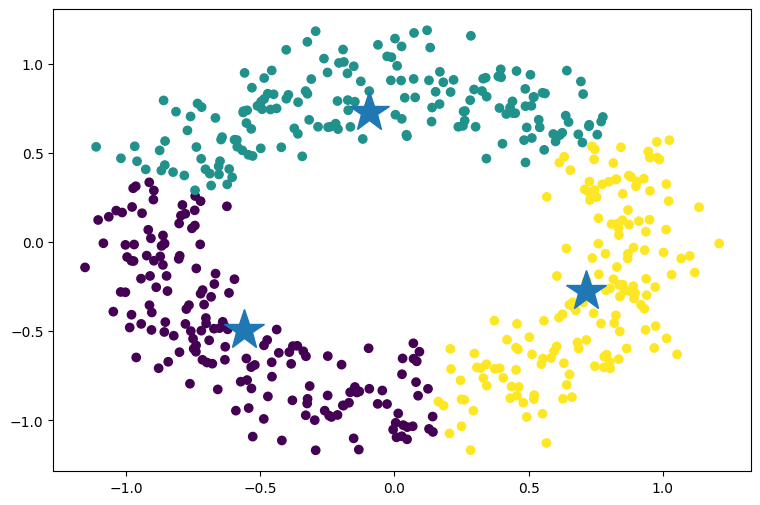

In [23]:
y_pred, centroids = kmeans(x,3)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0], centroids[:,1], '*', markersize=30)
plt.show()

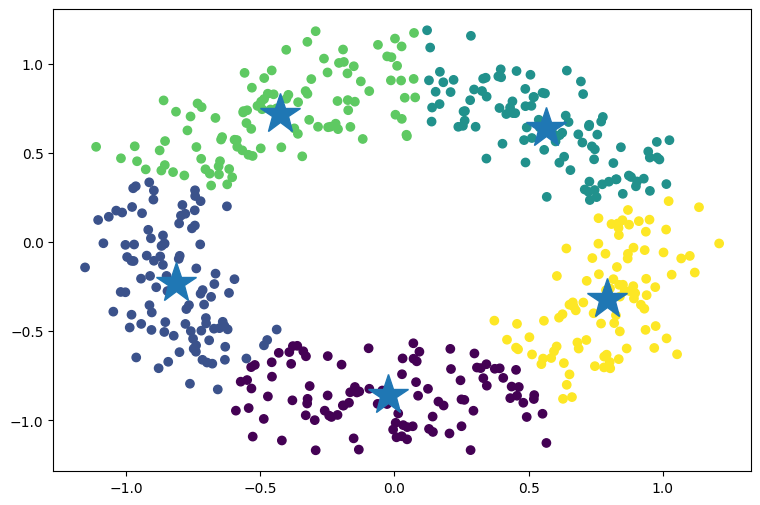

In [24]:
y_pred, centroids = kmeans(x,5)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0], centroids[:,1], '*', markersize=30)
plt.show()

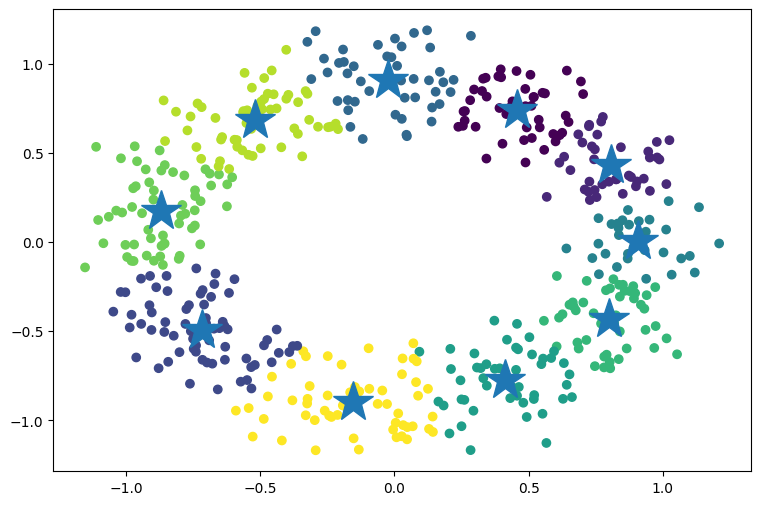

In [25]:
y_pred, centroids = kmeans(x,10)
plt.figure(figsize=(9,6))
plt.scatter(x[:,0], x[:,1], c=y_pred)
plt.plot(centroids[:,0], centroids[:,1], '*', markersize=30)
plt.show()